## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/HW3-Data-V3.csv')
df

,X,Y,class
0,1,15,0
1,2,10,1
2,2,11,1
3,2,15,1
4,3,12,0
...,...,...,...
199,110,67,1
200,109,82,1
201,115,98,1
202,112,77,1


## Plotting

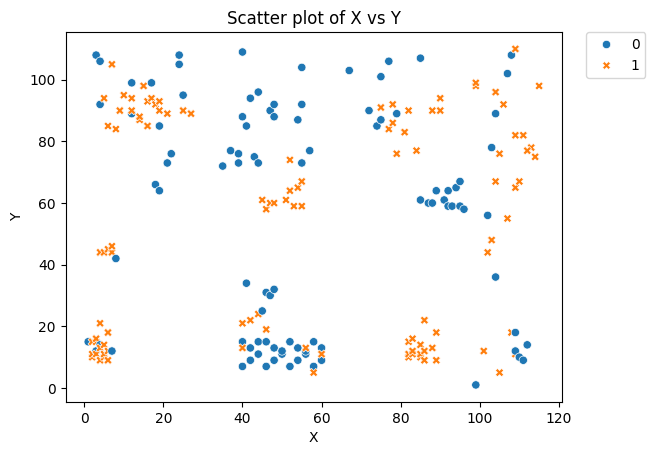

In [3]:
# plot X and Y using seaborn
sns.scatterplot(data=df, x='X', y='Y', hue='class', style='class')
plt.title('Scatter plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [4]:
# # draw the first decision boundary of a classifier
# from sklearn.tree import DecisionTreeClassifier
# X = df[['X', 'Y']]
# y = df['class']
# clf = DecisionTreeClassifier(max_depth=3)
# clf.fit(X, y)
# # plot decision boundary
# xx, yy = np.meshgrid(np.linspace(X['X'].min(), X['X'].max(), 100),
#                      np.linspace(X['Y'].min(), X['Y'].max(), 100))
# # Create DataFrame with proper column names for prediction
# mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X', 'Y'])
# Z = clf.predict(mesh_points).reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.3)
# plt.scatter(X['X'], X['Y'], c=y, edgecolor='k')
# plt.title('Decision Boundary of Decision Tree Classifier (max_depth={})'.format(clf.max_depth))
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

## Split data

In [5]:
# 66% training and 34% testing
from sklearn.model_selection import train_test_split
X = df[['X', 'Y']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=1283)

# shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((134, 2), (70, 2), (134,), (70,))

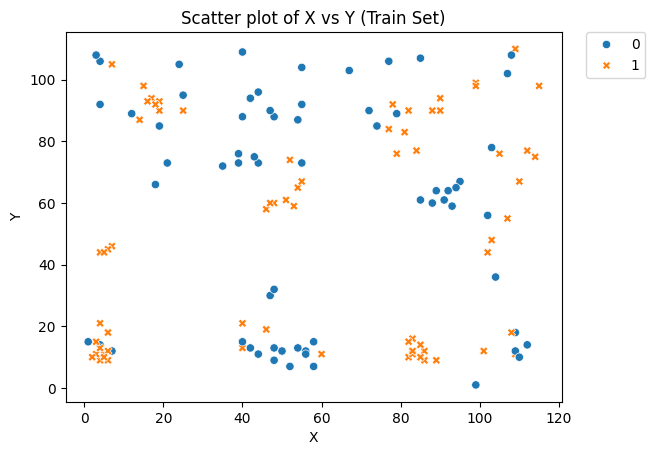

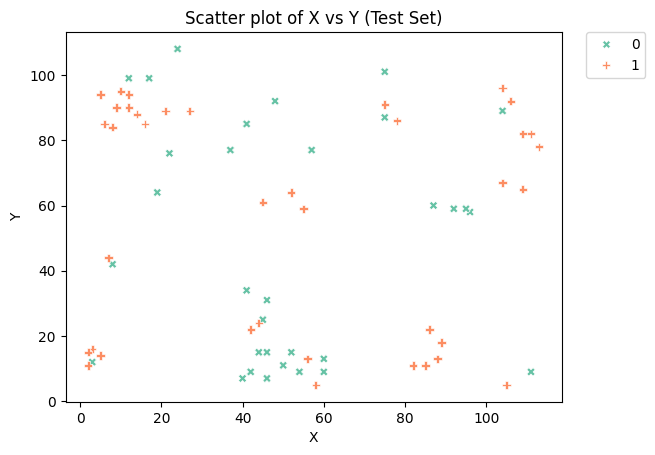

In [22]:
# plot the train and test sets on 2 scatter plot
sns.scatterplot(x='X', y='Y', hue='class', style='class', data=X_train.join(y_train))
plt.title('Scatter plot of X vs Y (Train Set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

# change symbols for train and test sets
sns.scatterplot(x='X', y='Y', hue='class', style='class', data=X_test.join(y_test), palette='Set2', markers=['X', 'P'])
plt.title('Scatter plot of X vs Y (Test Set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


## sklearn Decision Tree

### max_depth=3

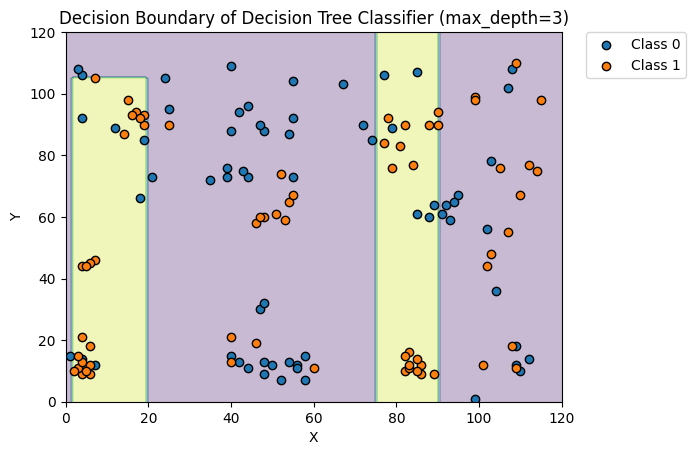

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf_max_depth_3 = DecisionTreeClassifier(max_depth=3)
clf_max_depth_3.fit(X_train, y_train)
# plot decision boundary
xx, yy = np.meshgrid(np.linspace(0, 120, 120),
                     np.linspace(0, 120, 120))
# Create DataFrame with proper column names for prediction
mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X', 'Y'])
Z = clf_max_depth_3.predict(mesh_points).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

# Create scatter plot with labels for legend
for class_val in y_train.unique():
    mask = y_train == class_val
    plt.scatter(X_train[mask]['X'], X_train[mask]['Y'], 
               c=f'C{class_val}', label=f'Class {class_val}', edgecolor='k')

plt.title('Decision Boundary of Decision Tree Classifier (max_depth={})'.format(clf_max_depth_3.max_depth))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### Test performance

In [8]:
# test using test set
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf_max_depth_3.predict(X_test)

# to dataframe confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                     index=['Actual 0', 'Actual 1'],
                     columns=['Predicted 0', 'Predicted 1'])

print(f"(*) Confusion Matrix:\n{df_cm}")
print(f"\n(*) Classification Report:\n{classification_report(y_test, y_pred)}")

(*) Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           26            6
Actual 1           18           20

(*) Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.81      0.68        32
           1       0.77      0.53      0.62        38

    accuracy                           0.66        70
   macro avg       0.68      0.67      0.65        70
weighted avg       0.69      0.66      0.65        70



In [9]:
from sklearn.tree import export_text
# Export the decision tree to a text format
tree_rules_text = export_text(clf_max_depth_3, feature_names=X_train.columns.tolist(), class_names=['0', '1'])
# Print the text representation
print(tree_rules_text)


|--- X <= 20.00
|   |--- Y <= 105.50
|   |   |--- X <= 1.50
|   |   |   |--- class: 0
|   |   |--- X >  1.50
|   |   |   |--- class: 1
|   |--- Y >  105.50
|   |   |--- class: 0
|--- X >  20.00
|   |--- X <= 75.50
|   |   |--- Y <= 69.50
|   |   |   |--- class: 0
|   |   |--- Y >  69.50
|   |   |   |--- class: 0
|   |--- X >  75.50
|   |   |--- X <= 90.50
|   |   |   |--- class: 1
|   |   |--- X >  90.50
|   |   |   |--- class: 0



### max_depth=4

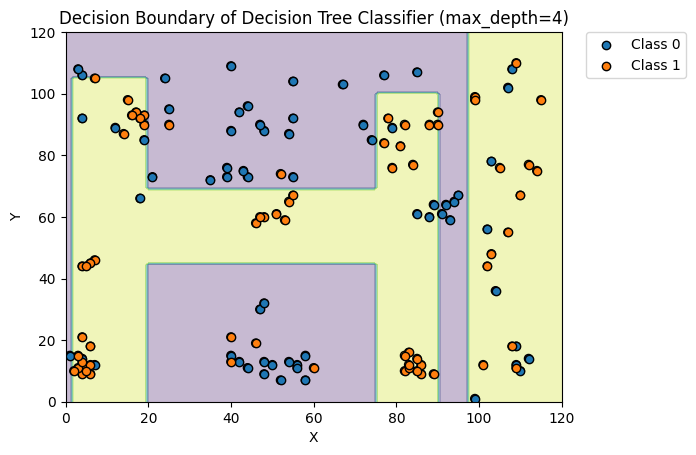

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf_max_depth_4 = DecisionTreeClassifier(max_depth=4)
clf_max_depth_4.fit(X_train, y_train)
# plot decision boundary
xx, yy = np.meshgrid(np.linspace(0, 120, 120),
                     np.linspace(0, 120, 120))
# Create DataFrame with proper column names for prediction
mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X', 'Y'])
Z = clf_max_depth_4.predict(mesh_points).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train['X'], X_train['Y'], c=y_train, edgecolor='k')

# Create scatter plot with labels for legend
for class_val in y_train.unique():
    mask = y_train == class_val
    plt.scatter(X_train[mask]['X'], X_train[mask]['Y'], 
               c=f'C{class_val}', label=f'Class {class_val}', edgecolor='k')

plt.title('Decision Boundary of Decision Tree Classifier (max_depth={})'.format(clf_max_depth_4.max_depth))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [11]:
# test using test set
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf_max_depth_4.predict(X_test)

# to dataframe confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                     index=['Actual 0', 'Actual 1'],
                     columns=['Predicted 0', 'Predicted 1'])

print(f"(*) Confusion Matrix:\n{df_cm}")
print(f"\n(*) Classification Report:\n{classification_report(y_test, y_pred)}")

(*) Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           24            8
Actual 1            7           31

(*) Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.79      0.82      0.81        38

    accuracy                           0.79        70
   macro avg       0.78      0.78      0.78        70
weighted avg       0.79      0.79      0.79        70



In [12]:
from sklearn.tree import export_text
# Export the decision tree to a text format
tree_rules_text = export_text(clf_max_depth_4, feature_names=X_train.columns.tolist(), class_names=['0', '1'])
# Print the text representation
print(tree_rules_text)


|--- X <= 20.00
|   |--- Y <= 105.50
|   |   |--- X <= 1.50
|   |   |   |--- class: 0
|   |   |--- X >  1.50
|   |   |   |--- Y <= 56.00
|   |   |   |   |--- class: 1
|   |   |   |--- Y >  56.00
|   |   |   |   |--- class: 1
|   |--- Y >  105.50
|   |   |--- class: 0
|--- X >  20.00
|   |--- X <= 75.50
|   |   |--- Y <= 69.50
|   |   |   |--- Y <= 45.00
|   |   |   |   |--- class: 0
|   |   |   |--- Y >  45.00
|   |   |   |   |--- class: 1
|   |   |--- Y >  69.50
|   |   |   |--- X <= 30.00
|   |   |   |   |--- class: 0
|   |   |   |--- X >  30.00
|   |   |   |   |--- class: 0
|   |--- X >  75.50
|   |   |--- X <= 90.50
|   |   |   |--- Y <= 100.00
|   |   |   |   |--- class: 1
|   |   |   |--- Y >  100.00
|   |   |   |   |--- class: 0
|   |   |--- X >  90.50
|   |   |   |--- X <= 97.00
|   |   |   |   |--- class: 0
|   |   |   |--- X >  97.00
|   |   |   |   |--- class: 1



## Consider the 120x120 grid as test data

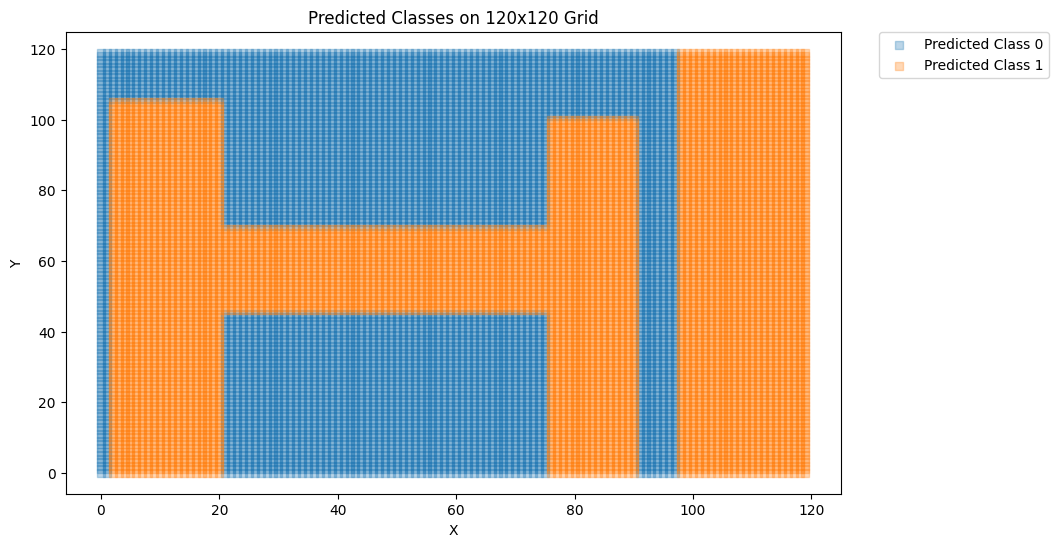

In [13]:
# consider the 120x120 grid as test data


# Define the grid dimensions
grid_size = 120

# Create arrays for the x and y coordinates
# We use arange() to generate coordinates from 0 to 119
x_coords = np.arange(grid_size)
y_coords = np.arange(grid_size)

# Use meshgrid to create all combinations of x and y coordinates
# This creates a grid of all possible (x,y) pairs
xx, yy = np.meshgrid(x_coords, y_coords)

# Flatten the meshgrid arrays to create a list of all coordinate pairs
x_flattened = xx.flatten()
y_flattened = yy.flatten()

# Create a dictionary to hold the data
# A 'value' column is added and initialized with zeros, but can be populated later
data = {
    'X': x_flattened,
    'Y': y_flattened,
    'value': np.zeros(grid_size * grid_size) # Or some other initial value
}

# Create the pandas DataFrame from the dictionary
df = pd.DataFrame(data)
grid_points = df[['X', 'Y']]
grid_predictions = clf_max_depth_4.predict(grid_points)

# plot the predicted classes on the grid
plt.figure(figsize=(10, 6))
for class_val in np.unique(grid_predictions):
    mask = grid_predictions == class_val
    plt.scatter(grid_points[mask]['X'], grid_points[mask]['Y'], 
                label=f'Predicted Class {class_val}', alpha=0.3, marker='s')

# # Add original data points with labels for legend
# for class_val in y.unique():
#     mask = y == class_val
#     plt.scatter(X[mask]['X'], X[mask]['Y'], c=f'C{class_val}', 
#                 label=f'Original Class {class_val}', edgecolor='k', s=50)

plt.title('Predicted Classes on 120x120 Grid')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()